In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
import datetime

In [85]:
#path = 'C:\Users\vince\Documents\Methods of Research\Dataset\efan_ricecooker_ekettle.csv'
path = '/content/drive/MyDrive/CPE 020 (Methods of Research) - Final Paper (Group 3)/Appendices/Cleaned Datasets (CSV)/Electric Fan, Rice Cooker, Electric Kettle.csv'
df = pd.read_csv(path)

df.head()

,Voltage,Current,Power,Energy,Frequency,Power Factor,Electric Fan,Rice Cooker,Electric Kettle
0,243.4,0.2,45.6,0.34,59.8,0.95,1,0,0
1,243.3,0.2,45.7,0.34,59.8,0.95,1,0,0
2,243.4,0.2,45.7,0.34,59.8,0.95,1,0,0
3,243.3,0.2,45.7,0.34,59.8,0.95,1,0,0
4,243.4,0.2,45.7,0.34,59.9,0.95,1,0,0


In [86]:
df.rename(columns={'oltge':'Voltage (V)',
                   'Current':'Current (A)',
                   'Poer':'Power (W)',
                   'Energy':'Energy (kWh)',
                   'Poer Fctor':'Power Factor',
                   'Frequency':'Frequency (Hz)',
                   'Electric Fn':'Electric Fan'
                   },
          inplace=True)

In [87]:
df.columns

Index(['Voltage', 'Current (A)', 'Power', 'Energy (kWh)', 'Frequency (Hz)',
       'Power Factor', 'Electric Fan', 'Rice Cooker', 'Electric Kettle'],
      dtype='object')

## Electric Fan

In [88]:
electric_fan = df[(df['Electric Fan'] == 1) & (df['Electric Kettle'] == 0) & (df['Rice Cooker'] == 0)]
electric_fan.shape

(56, 9)

In [89]:
electric_fan['timestamp'] = np.arange(0.001, 0.057, 0.001)
electric_fan.head()

<ipython-input-89-54a59ad39d53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electric_fan['timestamp'] = np.arange(0.001, 0.057, 0.001)


,Voltage,Current (A),Power,Energy (kWh),Frequency (Hz),Power Factor,Electric Fan,Rice Cooker,Electric Kettle,timestamp
0,243.4,0.2,45.6,0.34,59.8,0.95,1,0,0,0.001
1,243.3,0.2,45.7,0.34,59.8,0.95,1,0,0,0.002
2,243.4,0.2,45.7,0.34,59.8,0.95,1,0,0,0.003
3,243.3,0.2,45.7,0.34,59.8,0.95,1,0,0,0.004
4,243.4,0.2,45.7,0.34,59.9,0.95,1,0,0,0.005


In [90]:
cols = list(electric_fan.columns)
cols = [cols[-1]] + cols[:-1]
electric_fan = electric_fan[cols]
electric_fan.head()

,timestamp,Voltage,Current (A),Power,Energy (kWh),Frequency (Hz),Power Factor,Electric Fan,Rice Cooker,Electric Kettle
0,0.001,243.4,0.2,45.6,0.34,59.8,0.95,1,0,0
1,0.002,243.3,0.2,45.7,0.34,59.8,0.95,1,0,0
2,0.003,243.4,0.2,45.7,0.34,59.8,0.95,1,0,0
3,0.004,243.3,0.2,45.7,0.34,59.8,0.95,1,0,0
4,0.005,243.4,0.2,45.7,0.34,59.9,0.95,1,0,0


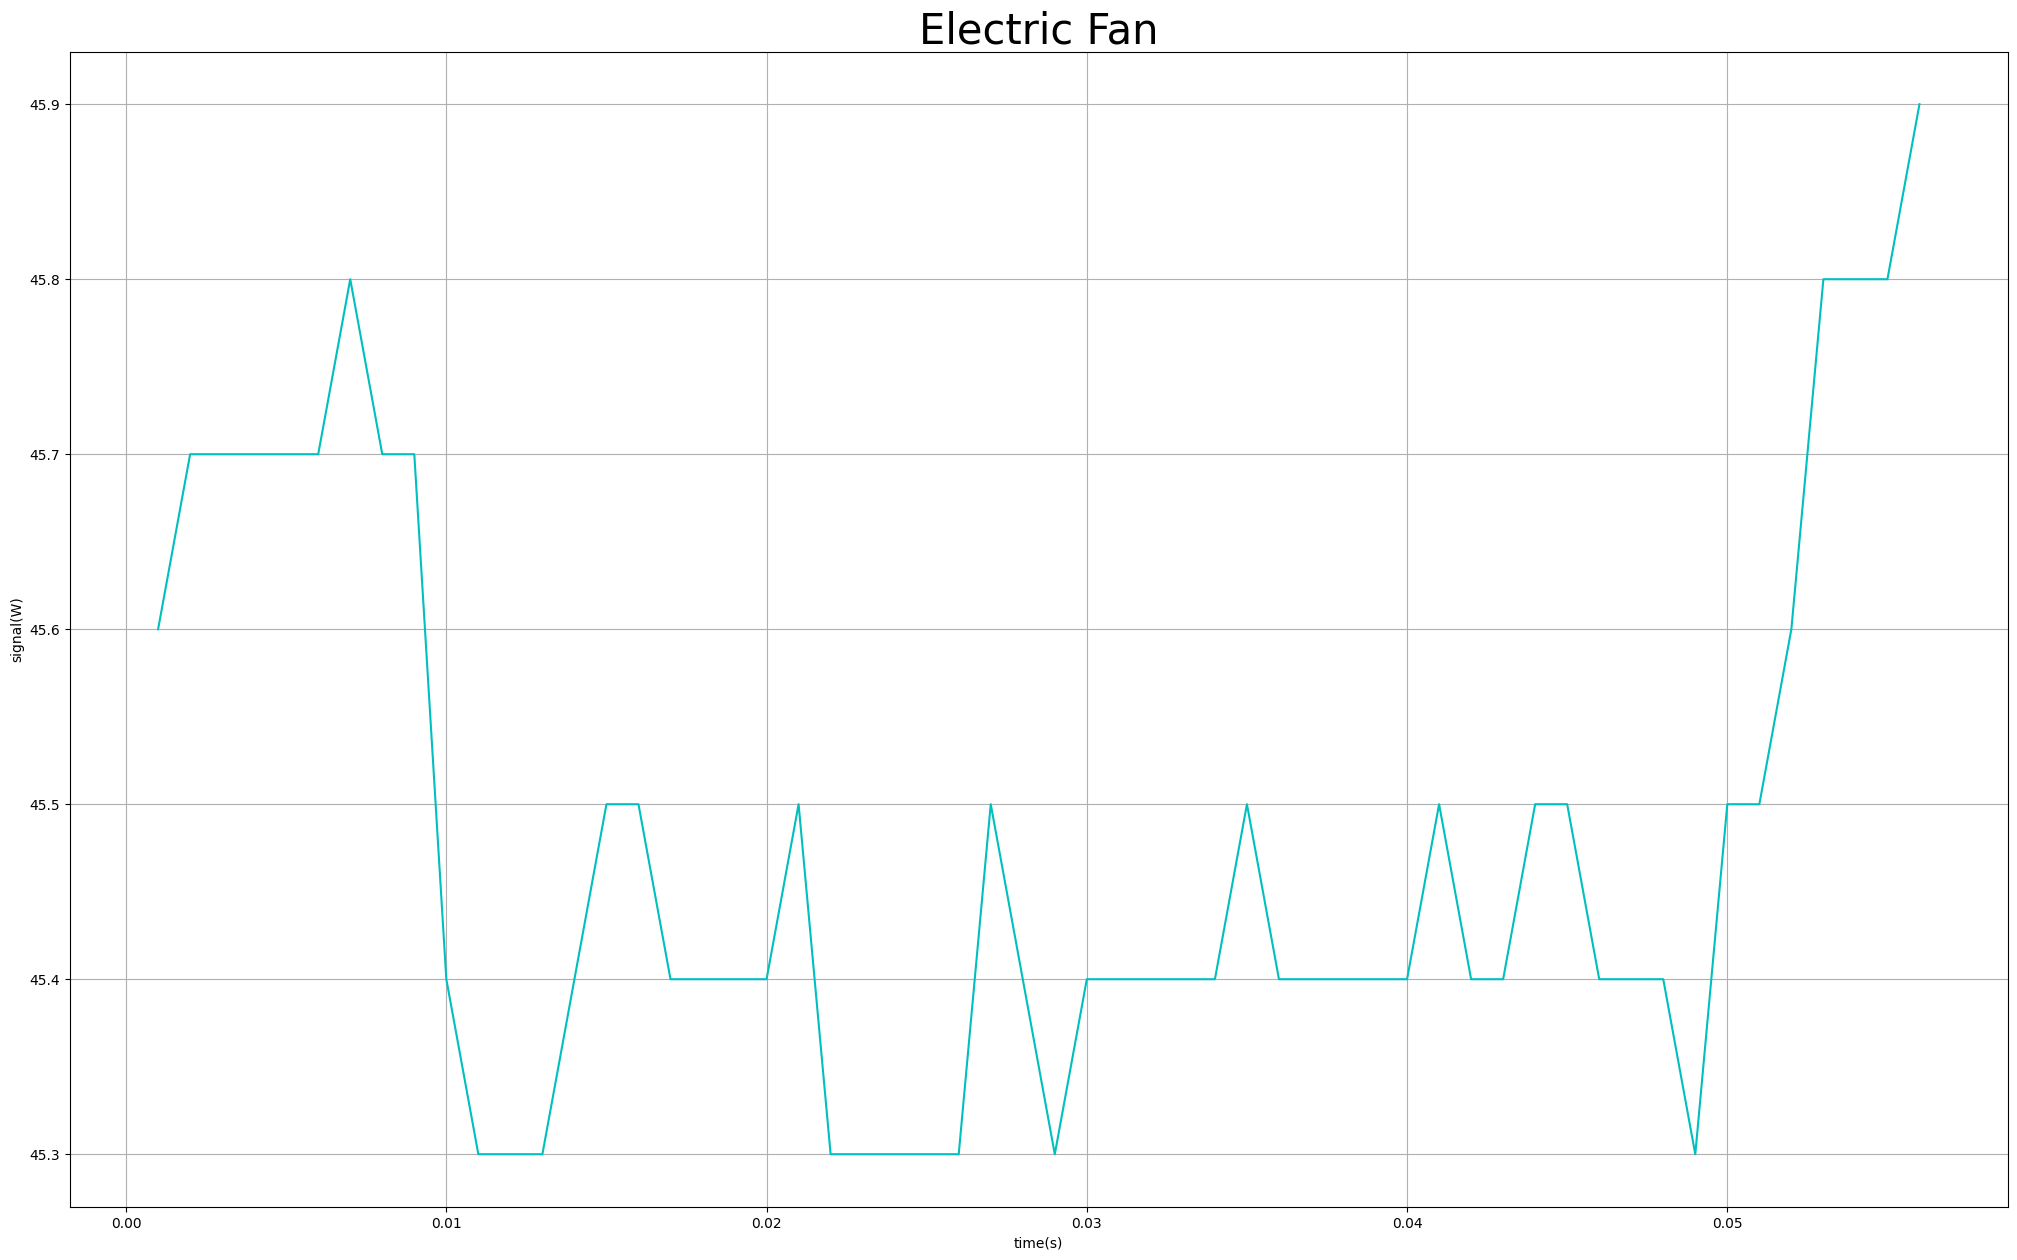

In [91]:
plt.figure(figsize=(25, 15))
plt.plot(electric_fan['timestamp'], electric_fan['Power'], color="c")
plt.grid(True)
plt.xlabel("time(s)", position=(0.95, 1))
plt.ylabel("signal(W)", position=(1, 0.9))
plt.title('Electric Fan', fontsize=30)
ax = plt.gca()

plt.show()

## Rice Cooker

In [92]:
rice_cooker = df[(df['Electric Fan'] == 0) & (df['Electric Kettle'] == 0) & (df['Rice Cooker'] == 1)]
rice_cooker.shape

(57, 9)

In [93]:
rice_cooker['timestamp'] = np.arange(0.001, 0.058, 0.001)
rice_cooker.head()

<ipython-input-93-ba8a3004c8c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rice_cooker['timestamp'] = np.arange(0.001, 0.058, 0.001)


,Voltage,Current (A),Power,Energy (kWh),Frequency (Hz),Power Factor,Electric Fan,Rice Cooker,Electric Kettle,timestamp
56,239.9,3.43,823.9,0.174,60.1,1.0,0,1,0,0.001
57,239.9,3.43,823.9,0.174,60.1,1.0,0,1,0,0.002
58,239.9,3.43,823.9,0.174,60.1,1.0,0,1,0,0.003
59,240.0,3.44,824.4,0.175,60.1,1.0,0,1,0,0.004
60,240.0,3.44,824.4,0.175,60.1,1.0,0,1,0,0.005


In [94]:
cols = list(rice_cooker.columns)
cols = [cols[-1]] + cols[:-1]
rice_cooker = rice_cooker[cols]
rice_cooker.head()

,timestamp,Voltage,Current (A),Power,Energy (kWh),Frequency (Hz),Power Factor,Electric Fan,Rice Cooker,Electric Kettle
56,0.001,239.9,3.43,823.9,0.174,60.1,1.0,0,1,0
57,0.002,239.9,3.43,823.9,0.174,60.1,1.0,0,1,0
58,0.003,239.9,3.43,823.9,0.174,60.1,1.0,0,1,0
59,0.004,240.0,3.44,824.4,0.175,60.1,1.0,0,1,0
60,0.005,240.0,3.44,824.4,0.175,60.1,1.0,0,1,0


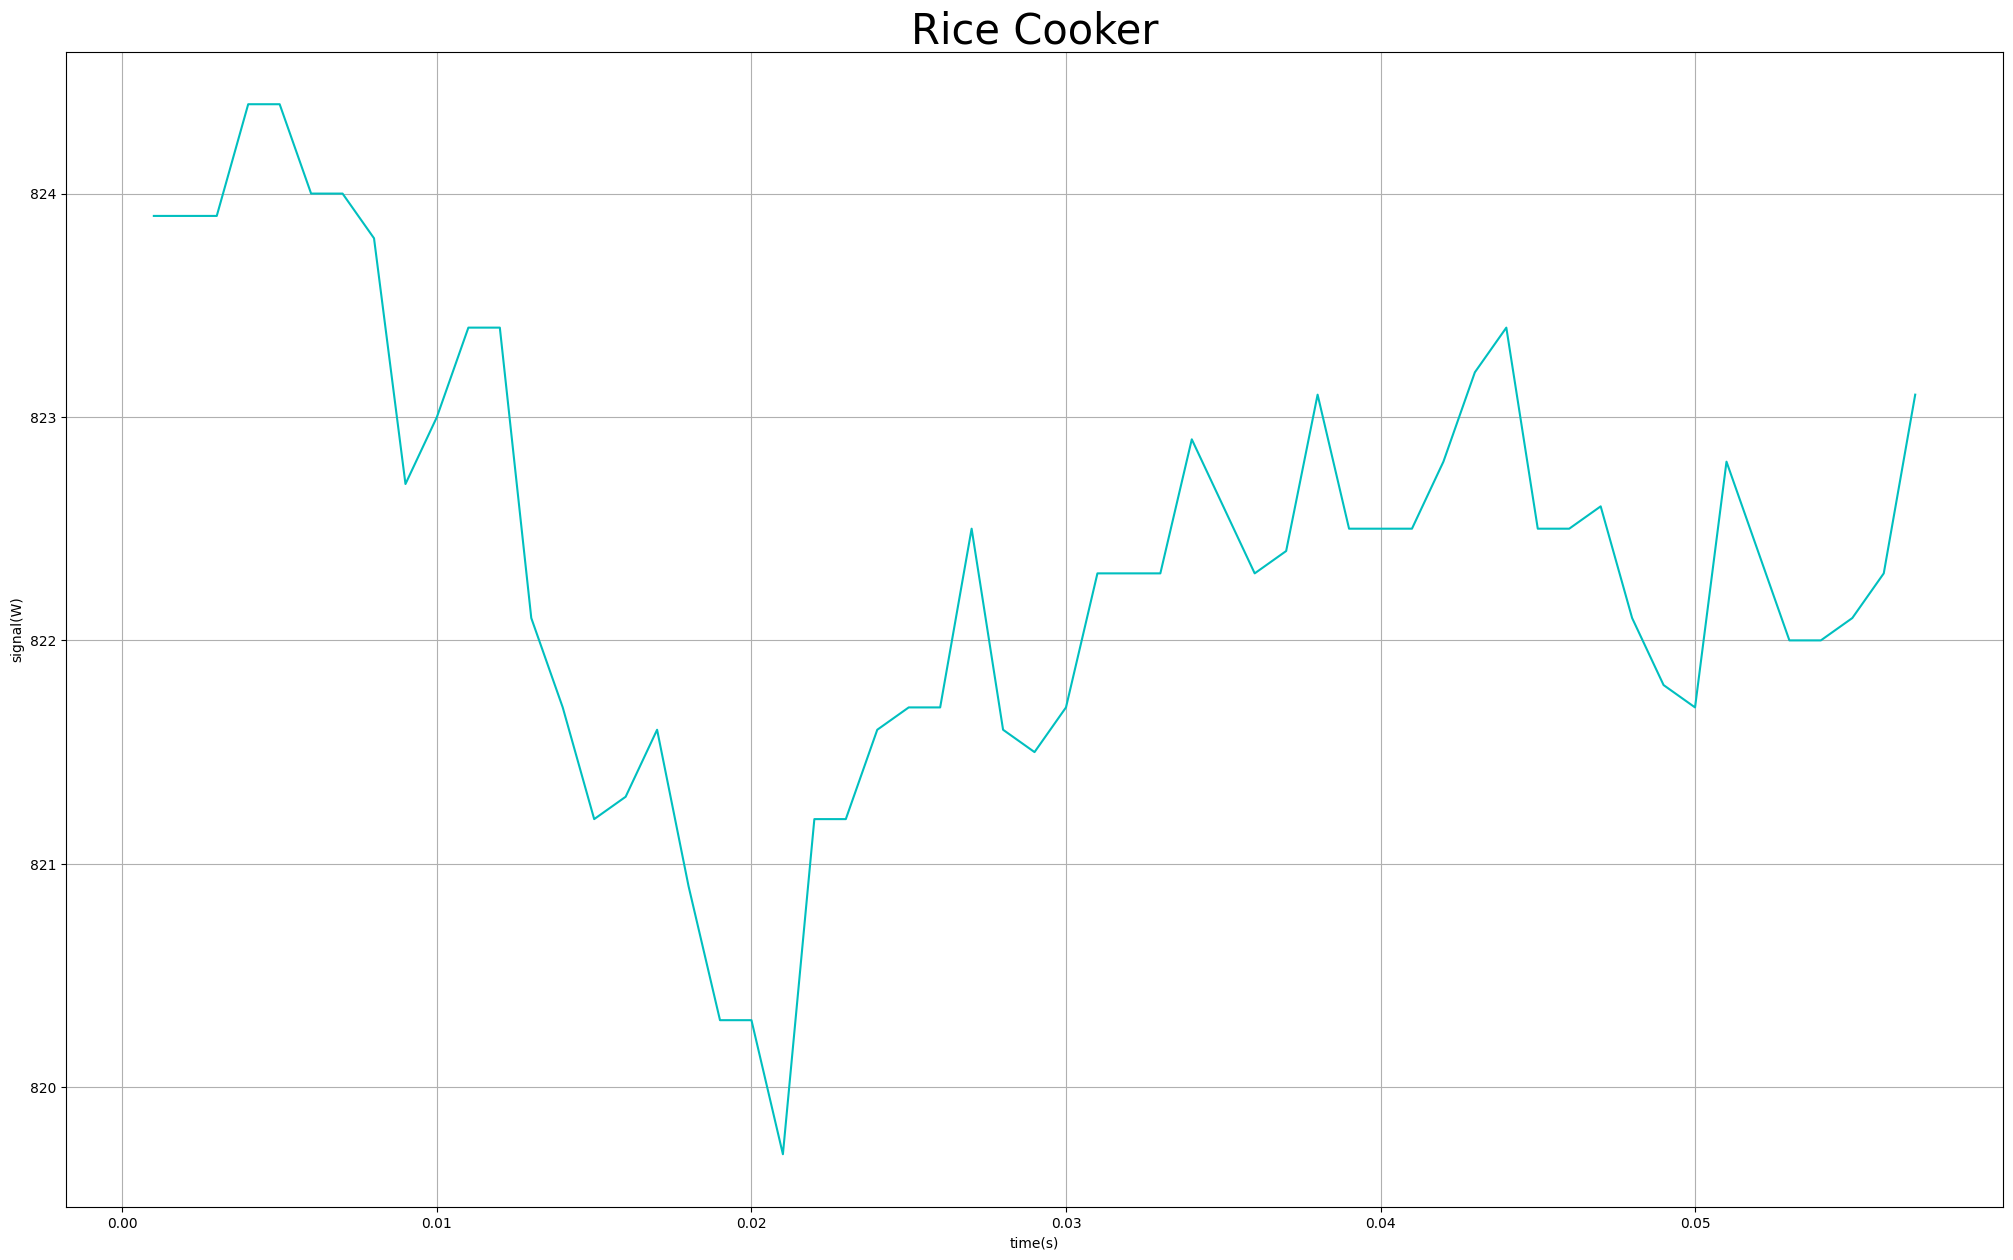

In [95]:
plt.figure(figsize=(25, 15))
plt.plot(rice_cooker['timestamp'], rice_cooker['Power'], color="c")
plt.grid(True)
plt.xlabel("time(s)", position=(0.95, 1))
plt.ylabel("signal(W)", position=(1, 0.9))
plt.title('Rice Cooker', fontsize=30)
ax = plt.gca()

plt.show()

## Electric Kettle

In [96]:
eletric_kettle = df[(df['Electric Fan'] == 0) & (df['Electric Kettle'] == 1) & (df['Rice Cooker'] == 0)]
eletric_kettle.shape

(56, 9)

In [97]:
eletric_kettle['timestamp'] = np.arange(0.001, 0.057, 0.001)
eletric_kettle.head()

<ipython-input-97-1fb7ae32ff4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eletric_kettle['timestamp'] = np.arange(0.001, 0.057, 0.001)


,Voltage,Current (A),Power,Energy (kWh),Frequency (Hz),Power Factor,Electric Fan,Rice Cooker,Electric Kettle,timestamp
113,238.6,6.80,1623.2,0.274,59.9,1.0,0,0,1,0.001
114,238.6,6.76,1614.0,0.275,59.9,1.0,0,0,1,0.002
115,238.8,6.75,1610.2,0.275,59.9,1.0,0,0,1,0.003
116,238.7,6.73,1606.5,0.276,59.9,1.0,0,0,1,0.004
117,238.7,6.71,1601.9,0.277,59.9,1.0,0,0,1,0.005


In [98]:
cols = list(eletric_kettle.columns)
cols = [cols[-1]] + cols[:-1]
eletric_kettle = eletric_kettle[cols]
eletric_kettle.head()

,timestamp,Voltage,Current (A),Power,Energy (kWh),Frequency (Hz),Power Factor,Electric Fan,Rice Cooker,Electric Kettle
113,0.001,238.6,6.80,1623.2,0.274,59.9,1.0,0,0,1
114,0.002,238.6,6.76,1614.0,0.275,59.9,1.0,0,0,1
115,0.003,238.8,6.75,1610.2,0.275,59.9,1.0,0,0,1
116,0.004,238.7,6.73,1606.5,0.276,59.9,1.0,0,0,1
117,0.005,238.7,6.71,1601.9,0.277,59.9,1.0,0,0,1


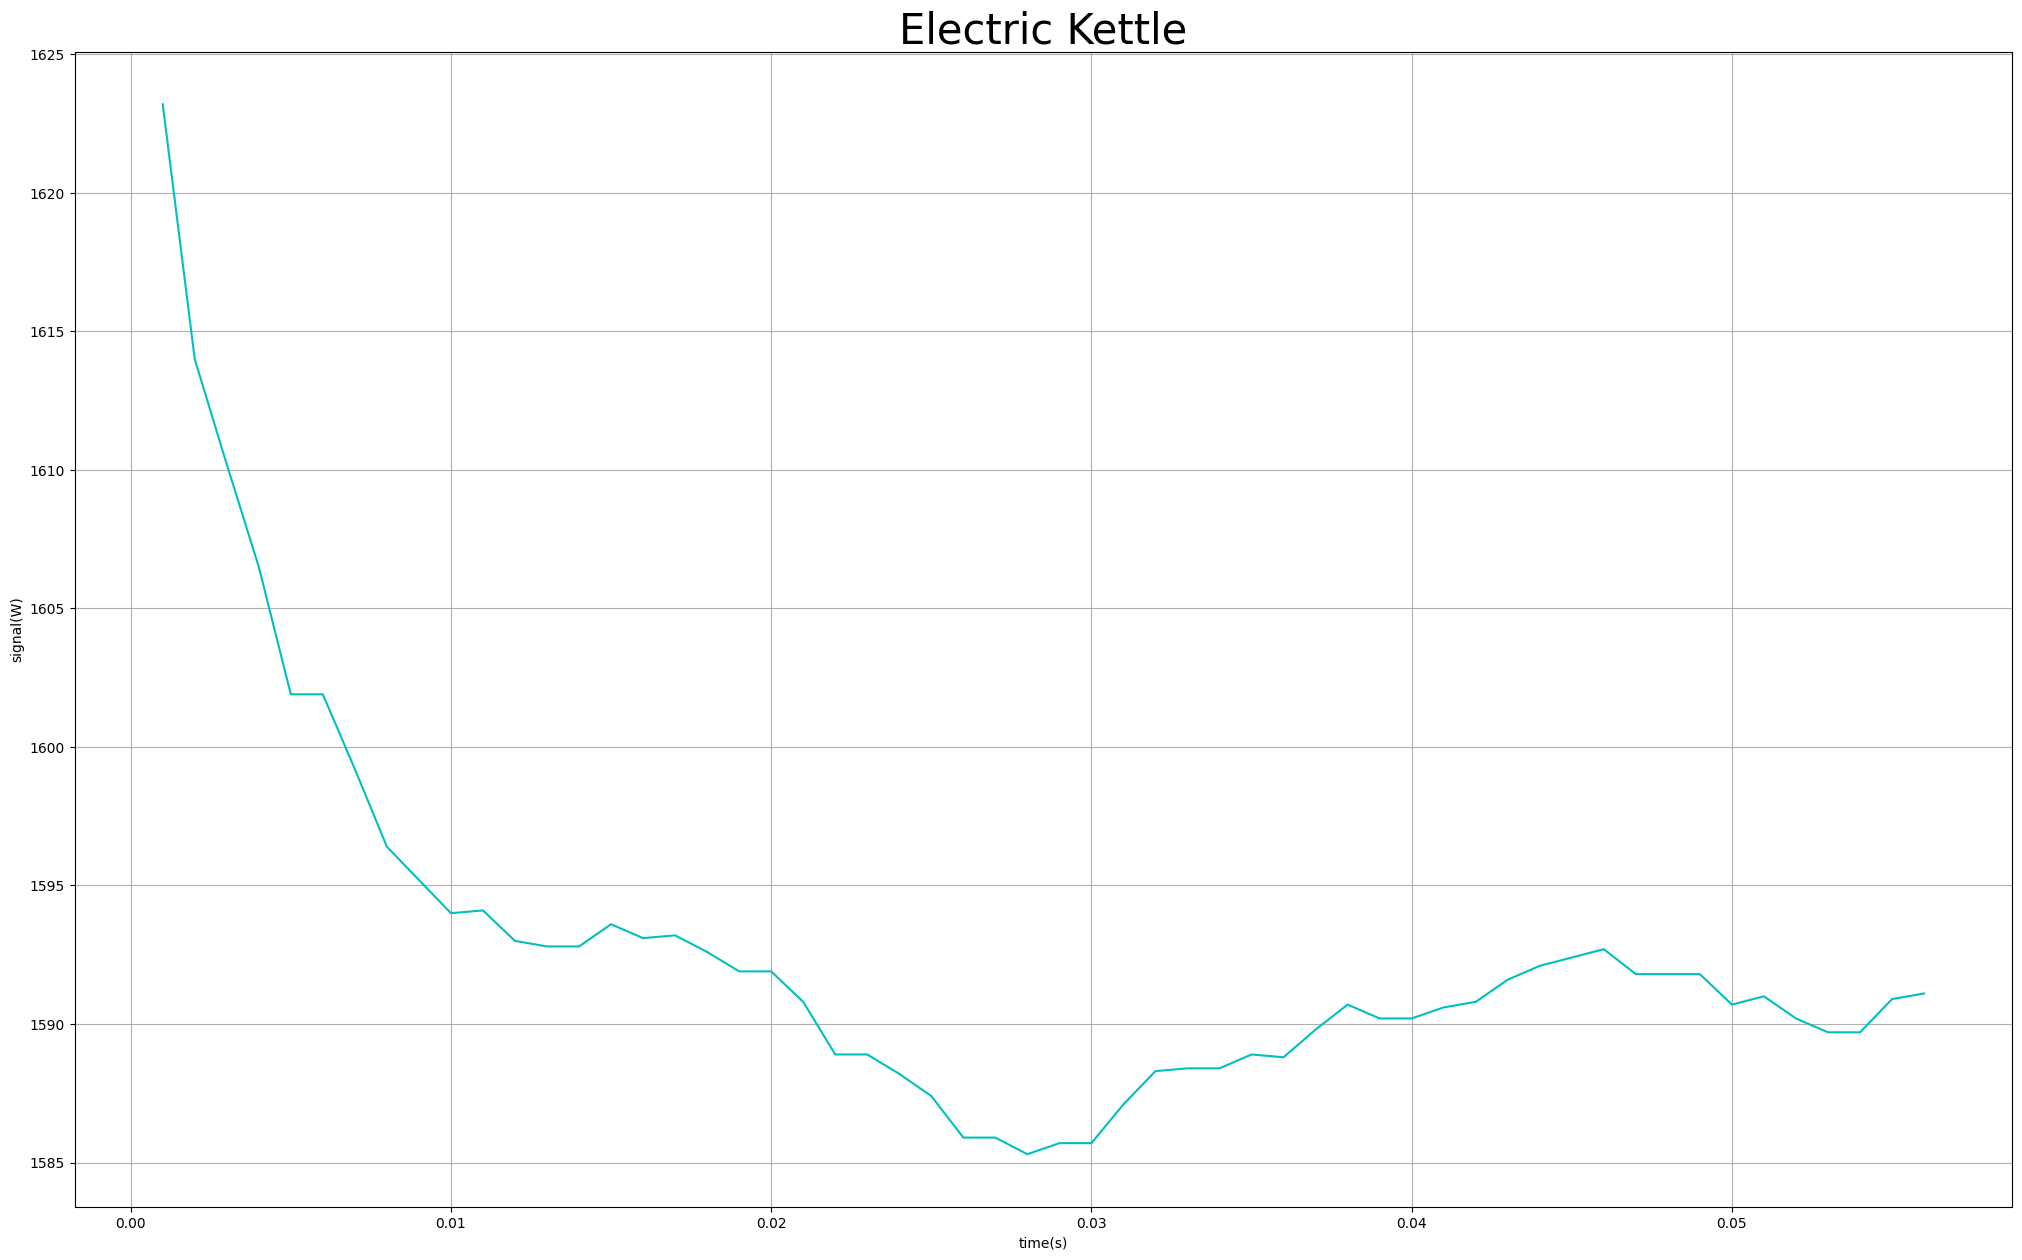

In [99]:
plt.figure(figsize=(25, 15))
plt.plot(eletric_kettle['timestamp'], eletric_kettle['Power'], color="c")
plt.grid(True)
plt.xlabel("time(s)", position=(0.95, 1))
plt.ylabel("signal(W)", position=(1, 0.9))
plt.title('Electric Kettle', fontsize=30)
ax = plt.gca()

plt.show()